In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('shipment_sample_data_1.csv')

# Filter the data for 'INNSA' in 'port_of_arr'
df = df[df['port_of_arrival'] == 'TRIST']

# Convert arrival and departure times to datetime
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%d-%m-%Y %H:%M')
df['depart_time'] = pd.to_datetime(df['depart_time'], format='%d-%m-%Y %H:%M')

# Calculate transit time in hours
df['transit_time'] = (df['arrival_time'] - df['depart_time']).dt.total_seconds() /( 3600*24)

df = df[df['transit_time'] > 0]

# Display the first few rows of the dataset
df

,scac,port_of_arrival,port_of_departure,arrival_time,depart_time,transit_time
0,AA10,TRIST,BEANR,2023-08-13 06:59:00,2023-07-27 23:16:00,16.321528
1,AA10,TRIST,BEANR,2023-09-27 11:21:00,2023-09-14 06:07:00,13.218056
2,AA10,TRIST,BEANR,2023-10-11 11:36:00,2023-09-29 23:56:00,11.486111
3,AA10,TRIST,BEANR,2023-11-22 00:00:00,2023-11-02 00:00:00,20.000000
5,AA10,TRIST,BEANR,2023-12-19 08:07:00,2023-12-05 10:23:00,13.905556
...,...,...,...,...,...,...
2363,AA31,TRIST,BEANR,2024-04-24 16:04:00,2024-04-12 00:00:00,12.669444
2383,AA31,TRIST,BEANR,2024-05-17 08:24:00,2024-05-03 18:36:00,13.575000
2396,AA31,TRIST,BEANR,2024-05-17 00:00:00,2024-05-03 00:00:00,14.000000
3327,AAA9,TRIST,BEANR,2024-05-12 02:40:00,2024-04-25 00:00:00,17.111111


In [2]:
missing_values = df.isnull().sum()
missing_values

scac                 0
port_of_arrival      0
port_of_departure    0
arrival_time         0
depart_time          0
transit_time         0
dtype: int64

In [3]:
print("Zero values before cleaning:")
print((df == 0).sum())

Zero values before cleaning:
scac                 0
port_of_arrival      0
port_of_departure    0
arrival_time         0
depart_time          0
transit_time         0
dtype: int64


In [4]:
duplicate_rows_before = df.duplicated().sum()
print(f"Number of duplicate rows before cleaning: {duplicate_rows_before}")

Number of duplicate rows before cleaning: 36


In [5]:
df.dropna(how='all', inplace=True)  # Drop any completely empty rows
df.drop_duplicates(inplace=True)  # Drop duplicate rows
df = df.dropna(subset=['arrival_time', 'depart_time'])
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,scac,port_of_arrival,port_of_departure,arrival_time,depart_time,transit_time
0,AA10,TRIST,BEANR,2023-08-13 06:59:00,2023-07-27 23:16:00,16.321528
1,AA10,TRIST,BEANR,2023-09-27 11:21:00,2023-09-14 06:07:00,13.218056
2,AA10,TRIST,BEANR,2023-10-11 11:36:00,2023-09-29 23:56:00,11.486111
3,AA10,TRIST,BEANR,2023-11-22 00:00:00,2023-11-02 00:00:00,20.000000
4,AA10,TRIST,BEANR,2023-12-19 08:07:00,2023-12-05 10:23:00,13.905556
...,...,...,...,...,...,...
61,AA31,TRIST,BEANR,2024-05-02 00:00:00,2024-04-22 00:00:00,10.000000
62,AA31,TRIST,BEANR,2024-04-24 16:04:00,2024-04-12 00:00:00,12.669444
63,AA31,TRIST,BEANR,2024-05-17 08:24:00,2024-05-03 18:36:00,13.575000
64,AAA9,TRIST,BEANR,2024-05-12 02:40:00,2024-04-25 00:00:00,17.111111


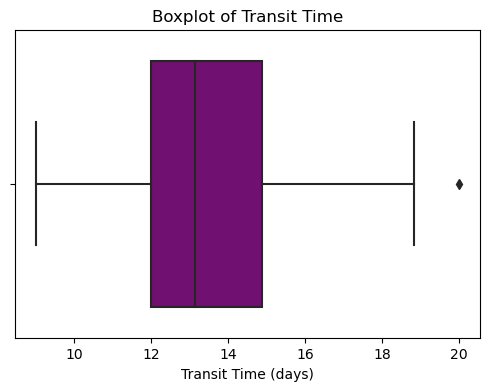

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['transit_time'], color='purple')
plt.title('Boxplot of Transit Time')
plt.xlabel('Transit Time (days)')
plt.show()

In [11]:
Q1 = df['transit_time'].quantile(0.25)
Q3 = df['transit_time'].quantile(0.75)

IQR = Q3 - Q1

outliers = df[(df['transit_time'] < (Q1 - 1.5 * IQR)) | (df['transit_time'] > (Q3 + 1.5 * IQR))]

outliers

,scac,port_of_arrival,port_of_departure,arrival_time,depart_time,transit_time
3,AA10,TRIST,BEANR,2023-11-22,2023-11-02,20.0


In [12]:
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR 

df_cleaned = df[(df['transit_time'] >= lower_whisker) & (df['transit_time'] <= upper_whisker)]

df_cleaned


,scac,port_of_arrival,port_of_departure,arrival_time,depart_time,transit_time
0,AA10,TRIST,BEANR,2023-08-13 06:59:00,2023-07-27 23:16:00,16.321528
1,AA10,TRIST,BEANR,2023-09-27 11:21:00,2023-09-14 06:07:00,13.218056
2,AA10,TRIST,BEANR,2023-10-11 11:36:00,2023-09-29 23:56:00,11.486111
4,AA10,TRIST,BEANR,2023-12-19 08:07:00,2023-12-05 10:23:00,13.905556
5,AA10,TRIST,BEANR,2024-01-02 00:00:00,2023-12-22 00:00:00,11.000000
...,...,...,...,...,...,...
61,AA31,TRIST,BEANR,2024-05-02 00:00:00,2024-04-22 00:00:00,10.000000
62,AA31,TRIST,BEANR,2024-04-24 16:04:00,2024-04-12 00:00:00,12.669444
63,AA31,TRIST,BEANR,2024-05-17 08:24:00,2024-05-03 18:36:00,13.575000
64,AAA9,TRIST,BEANR,2024-05-12 02:40:00,2024-04-25 00:00:00,17.111111


In [13]:
import numpy as np
import pandas as pd

def calculate_statistics(data):
    statistics = {
        'Mean': data.mean(),
        'Median': data.median(),
        'Mode': data.mode()[0] if not data.mode().empty else np.nan,
        'IQR': data.quantile(0.75) - data.quantile(0.25),
        'Lower Whisker': data.quantile(0.25) - 1.5 * (data.quantile(0.75) - data.quantile(0.25)),
        'Upper Whisker': data.quantile(0.75) + 1.5 * (data.quantile(0.75) - data.quantile(0.25)),
        'Count': data.count(),
        'Std': data.std(),
        '25%': data.quantile(0.25),
        '50%': data.quantile(0.50),
        '75%': data.quantile(0.75),
        'Min': data.min(),
        'Max': data.max(),
    }
    return statistics



original_stats = calculate_statistics(df['transit_time'])
cleaned_stats = calculate_statistics(df_cleaned['transit_time'])

stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'IQR', 'Lower Whisker', 'Upper Whisker', 'Count', 'Std', 'Min', '25%', '50%', '75%', 'Max'],
    'Original Data': [
        original_stats['Mean'], original_stats['Median'], original_stats['Mode'],
        original_stats['IQR'], original_stats['Lower Whisker'], original_stats['Upper Whisker'],
        original_stats['Count'], original_stats['Std'], original_stats['Min'], original_stats['25%'], 
        original_stats['50%'], original_stats['75%'], original_stats['Max']
    ],
    'Cleaned Data': [
        cleaned_stats['Mean'], cleaned_stats['Median'], cleaned_stats['Mode'],
        cleaned_stats['IQR'], cleaned_stats['Lower Whisker'], cleaned_stats['Upper Whisker'],
        cleaned_stats['Count'], cleaned_stats['Std'], cleaned_stats['Min'], cleaned_stats['25%'],
        cleaned_stats['50%'], cleaned_stats['75%'], cleaned_stats['Max']
    ]
})

stats_df


,Statistic,Original Data,Cleaned Data
0,Mean,13.461742,13.361154
1,Median,13.125694,13.033333
2,Mode,14.000000,14.000000
3,IQR,2.888021,2.629167
4,Lower Whisker,7.667969,8.056250
5,Upper Whisker,19.220052,18.572917
6,Count,66.000000,65.000000
7,Std,2.170483,2.026420
8,Min,9.000000,9.000000
9,25%,12.000000,12.000000


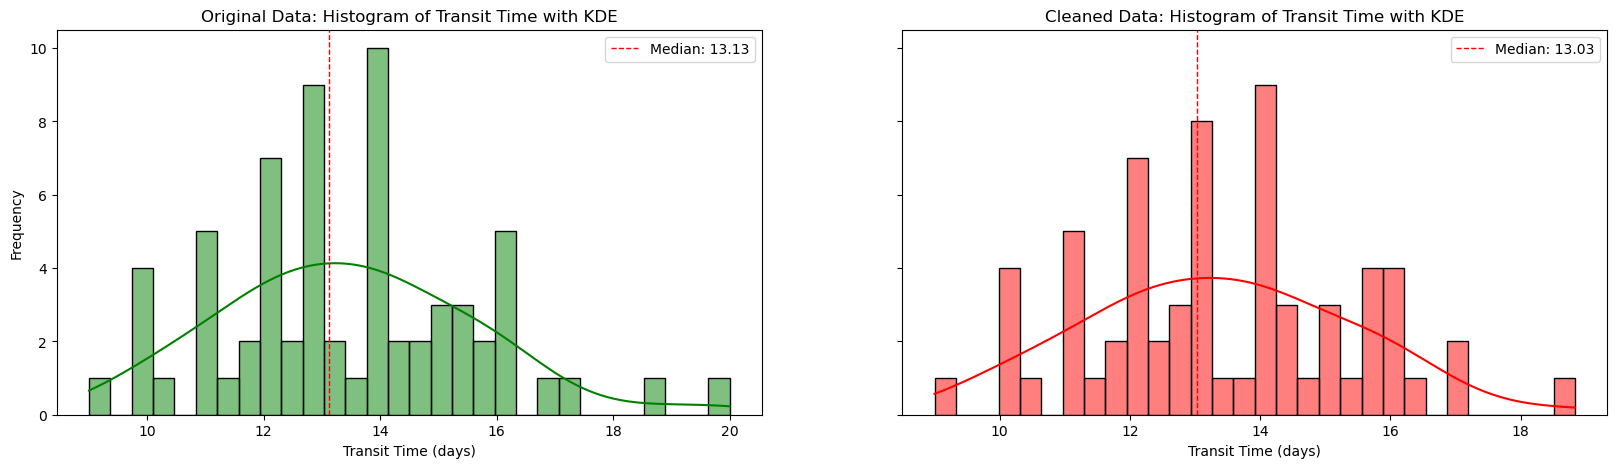

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)


sns.histplot(df['transit_time'], bins=30, kde=True, edgecolor='black',color='green',  ax=axes[0])
axes[0].set_title('Original Data: Histogram of Transit Time with KDE')
axes[0].set_xlabel('Transit Time (days)')
axes[0].set_ylabel('Frequency')


median_transit_time_original = df['transit_time'].median()

axes[0].axvline(median_transit_time_original, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_transit_time_original:.2f}')
axes[0].legend()


sns.histplot(df_cleaned['transit_time'], bins=30, kde=True, edgecolor='black',color='red',  ax=axes[1])
axes[1].set_title('Cleaned Data: Histogram of Transit Time with KDE')
axes[1].set_xlabel('Transit Time (days)')


median_transit_time_cleaned = df_cleaned['transit_time'].median()


axes[1].axvline(median_transit_time_cleaned, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_transit_time_cleaned:.2f}')
axes[1].legend()

plt.show()


In [15]:
transit_time_skewness = df['transit_time'].skew().round(2)
print("\nSkewness of transit_time of original data:")
print(transit_time_skewness)

transit_time_skewness = df_cleaned['transit_time'].skew().round(2)
print("\nSkewness of transit_time of cleaned data:")
print(transit_time_skewness)


Skewness of transit_time of original data:
0.44

Skewness of transit_time of cleaned data:
0.16


In [16]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Assume df_cleaned['transit_time'] already exists from previous steps

# Calculate statistics for cleaned data
cleaned_data = df_cleaned['transit_time']

# T-score confidence interval
t_critical = stats.t.ppf(0.975, df=len(cleaned_data)-1)  # 95% CI
t_mean = cleaned_data.mean()
t_std = cleaned_data.std(ddof=1)
t_margin_error = t_critical * (t_std / np.sqrt(len(cleaned_data)))
t_conf_interval = (t_mean - t_margin_error, t_mean + t_margin_error)

# Z-score confidence interval
z_critical = stats.norm.ppf(0.975)  # 95% CI
z_mean = cleaned_data.mean()
z_std = cleaned_data.std(ddof=1)
z_margin_error = z_critical * (z_std / np.sqrt(len(cleaned_data)))
z_conf_interval = (z_mean - z_margin_error, z_mean + z_margin_error)

# Bootstrapping confidence interval
np.random.seed(0)
bootstrap_samples = 1000
bootstrap_means = [np.mean(np.random.choice(cleaned_data, size=len(cleaned_data), replace=True)) for _ in range(bootstrap_samples)]
bootstrap_conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Compare the confidence intervals
conf_intervals = pd.DataFrame({
    'Method': ['T-score', 'Z-score', 'Bootstrapping'],
    'Lower Bound': [t_conf_interval[0], z_conf_interval[0], bootstrap_conf_interval[0]],
    'Upper Bound': [t_conf_interval[1], z_conf_interval[1], bootstrap_conf_interval[1]]
})

print(conf_intervals)

# Print standard deviation and variability measures
# print("Standard Deviation of Cleaned Data:", cleaned_data.std())
# print("Mean of Cleaned Data:", cleaned_data.mean())
# print("Bootstrap Mean Standard Deviation:", np.std(bootstrap_means))


          Method  Lower Bound  Upper Bound
0        T-score    12.859032    13.863276
1        Z-score    12.868524    13.853784
2  Bootstrapping    12.884545    13.840960


Original Skewness: 0.15
Log Transformation Skewness: -0.18921047754845285
Square Root Transformation Skewness: -0.031970156789103324
Box-Cox Transformation Skewness: -0.009726368381563088


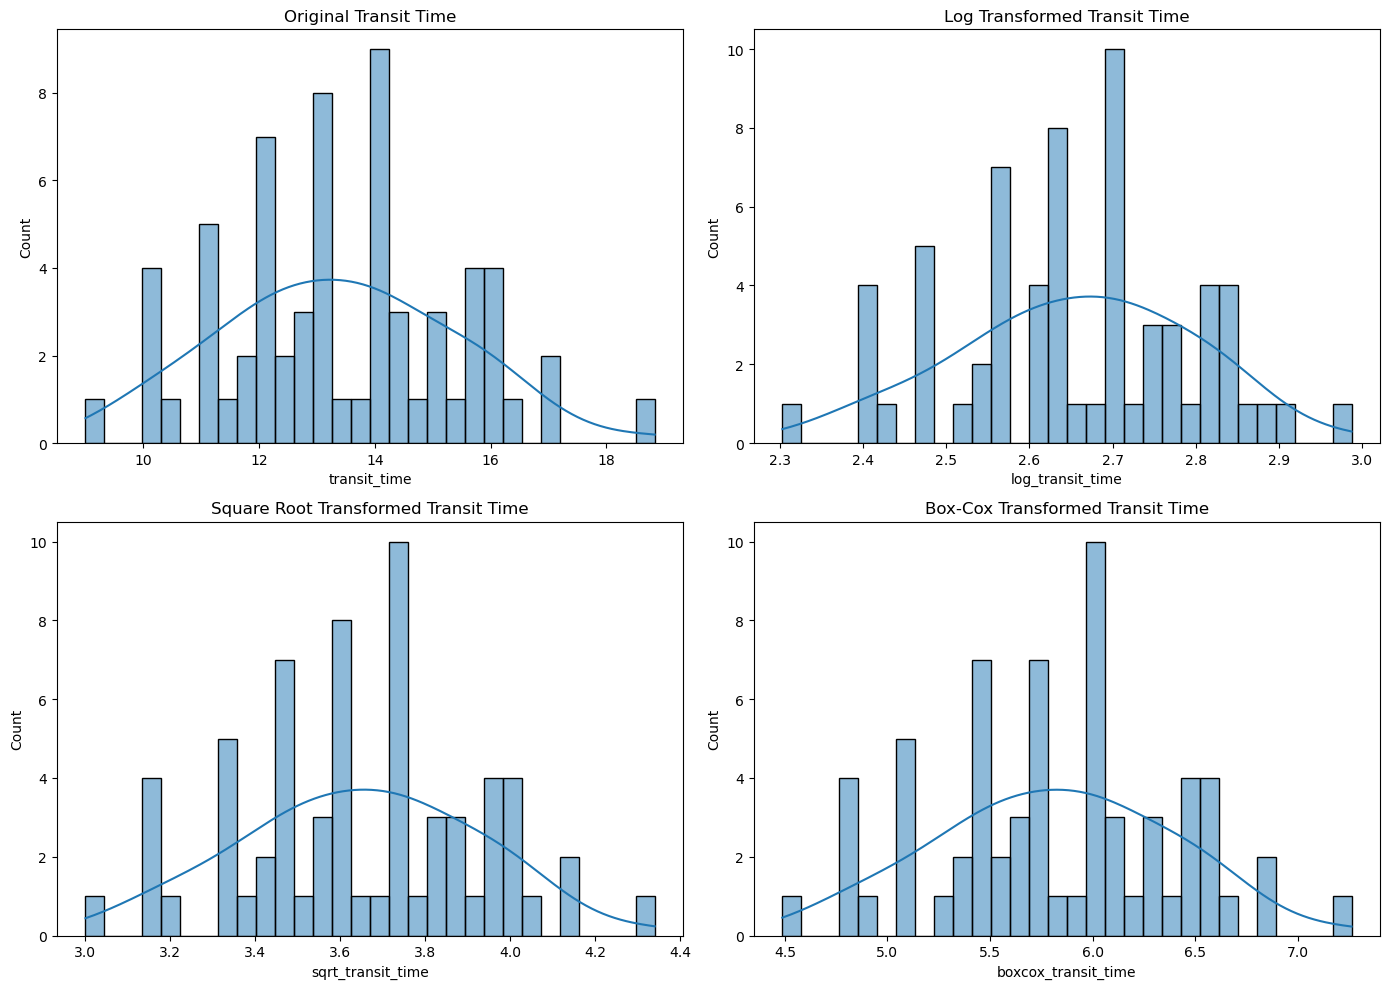

In [29]:
from scipy.stats import kurtosis, skew
from scipy.stats import boxcox

df_cleaned = df_cleaned.copy()
# Apply transformations
df_cleaned['log_transit_time'] = np.log(df_cleaned['transit_time'] + 1)  # Adding 1 to avoid log(0)
df_cleaned['sqrt_transit_time'] = np.sqrt(df_cleaned['transit_time'])
df_cleaned['boxcox_transit_time'], _ = boxcox(df_cleaned['transit_time'] + 1)  # Adding 1 to avoid negative values
 
# Calculate skewness
original_skewness = skew(df_cleaned['transit_time']).round(2)
log_skewness = skew(df_cleaned['log_transit_time'])
sqrt_skewness = skew(df_cleaned['sqrt_transit_time'])
boxcox_skewness = skew(df_cleaned['boxcox_transit_time'])

# Display skewness values
print(f"Original Skewness: {original_skewness}")
print(f"Log Transformation Skewness: {log_skewness}")
print(f"Square Root Transformation Skewness: {sqrt_skewness}")
print(f"Box-Cox Transformation Skewness: {boxcox_skewness}")

# Plot the distributions before and after transformations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df_cleaned['transit_time'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Transit Time')

sns.histplot(df_cleaned['log_transit_time'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Log Transformed Transit Time')

sns.histplot(df_cleaned['sqrt_transit_time'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Square Root Transformed Transit Time')

sns.histplot(df_cleaned['boxcox_transit_time'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Box-Cox Transformed Transit Time')

plt.tight_layout()
plt.show()


In [18]:
import numpy as np
import pandas as pd
from scipy import stats

# Function to calculate confidence interval
def calculate_ci(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)
    margin_err = std_err * stats.t.ppf((1 + confidence) / 2, len(data) - 1)
    return mean, mean - margin_err, mean + margin_err

# Calculate confidence interval for transit_time
transit_time_mean, transit_time_lower, transit_time_upper = calculate_ci(df_cleaned['transit_time'])

# Calculate confidence interval for log_transit_time
log_transit_time_mean, log_transit_time_lower, log_transit_time_upper = calculate_ci(df_cleaned['log_transit_time'])

# Create a DataFrame to display confidence intervals
ci_df = pd.DataFrame({
    'Statistic': ['Mean', '95% CI Lower', '95% CI Upper'],
    'Transit Time': [transit_time_mean, transit_time_lower, transit_time_upper],
    'Log-Transformed Time': [log_transit_time_mean, log_transit_time_lower, log_transit_time_upper]
})

ci_df


,Statistic,Transit Time,Log-Transformed Time
0,Mean,13.361154,2.654610
1,95% CI Lower,12.859032,2.619273
2,95% CI Upper,13.863276,2.689947


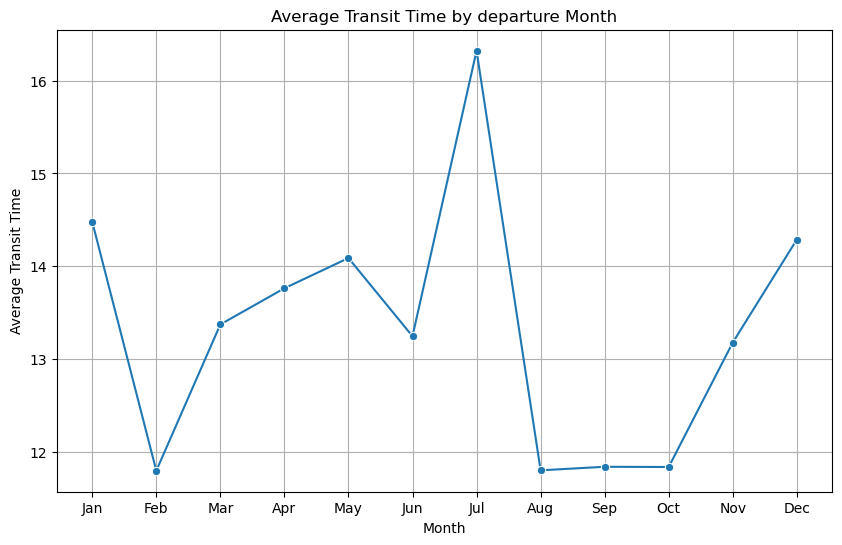

In [42]:
# Convert datetime columns to datetime objects
df_cleaned['arrival_time'] = pd.to_datetime(df_cleaned['arrival_time'])
df_cleaned['depart_time'] = pd.to_datetime(df_cleaned['depart_time'])

# Extract the month from the arrival_time
df_cleaned['depart_month'] = df_cleaned['depart_time'].dt.month

# Calculate the average transit_time for each month
monthly_transit_time = df_cleaned.groupby('depart_month')['transit_time'].mean().reset_index()

# Plot the monthly average transit time
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_transit_time, x='depart_month', y='transit_time', marker='o')
plt.title('Average Transit Time by departure Month')
plt.xlabel('Month')
plt.ylabel('Average Transit Time')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

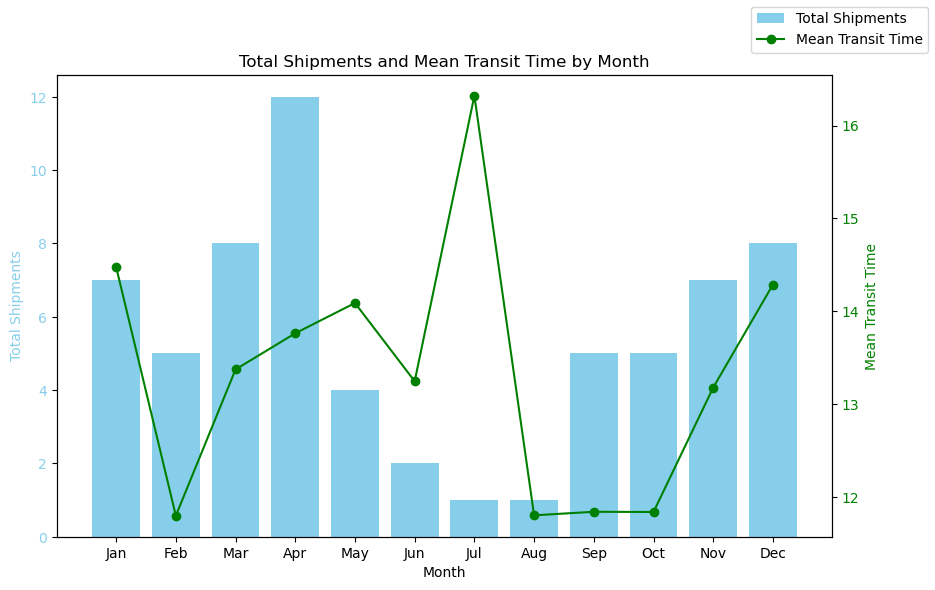

Monthly Statistics:
    month  mean_transit_time  total_shipments
0       1          14.478571                7
1       2          11.800000                5
2       3          13.375000                8
3       4          13.763947               12
4       5          14.089757                4
5       6          13.247917                2
6       7          16.321528                1
7       8          11.804167                1
8       9          11.842500                5
9      10          11.840139                5
10     11          13.179762                7
11     12          14.288194                8


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with arrival_time and transit_time columns

# Convert arrival_time to datetime if it's not already
df_cleaned['depart_time'] = pd.to_datetime(df_cleaned['depart_time'])

# Extract month from arrival_time
df_cleaned['month'] = df_cleaned['depart_time'].dt.month

# Group by month and calculate total shipment count and mean transit time
monthly_stats = df_cleaned.groupby('month').agg({
    'transit_time': ['mean', 'count']
}).reset_index()

# Renaming columns for clarity
monthly_stats.columns = ['month', 'mean_transit_time', 'total_shipments']

# Plotting both metrics in one graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total shipments
ax1.bar(monthly_stats['month'], monthly_stats['total_shipments'], color='skyblue', label='Total Shipments')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Shipments', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for mean transit time
ax2 = ax1.twinx()
ax2.plot(monthly_stats['month'], monthly_stats['mean_transit_time'], marker='o', linestyle='-', color='green', label='Mean Transit Time')
ax2.set_ylabel('Mean Transit Time', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and legend
plt.title('Total Shipments and Mean Transit Time by Month')
fig.legend(loc='upper right')

# Format x-axis ticks as month names
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

# Displaying the aggregated statistics
print("Monthly Statistics:")
print(monthly_stats)


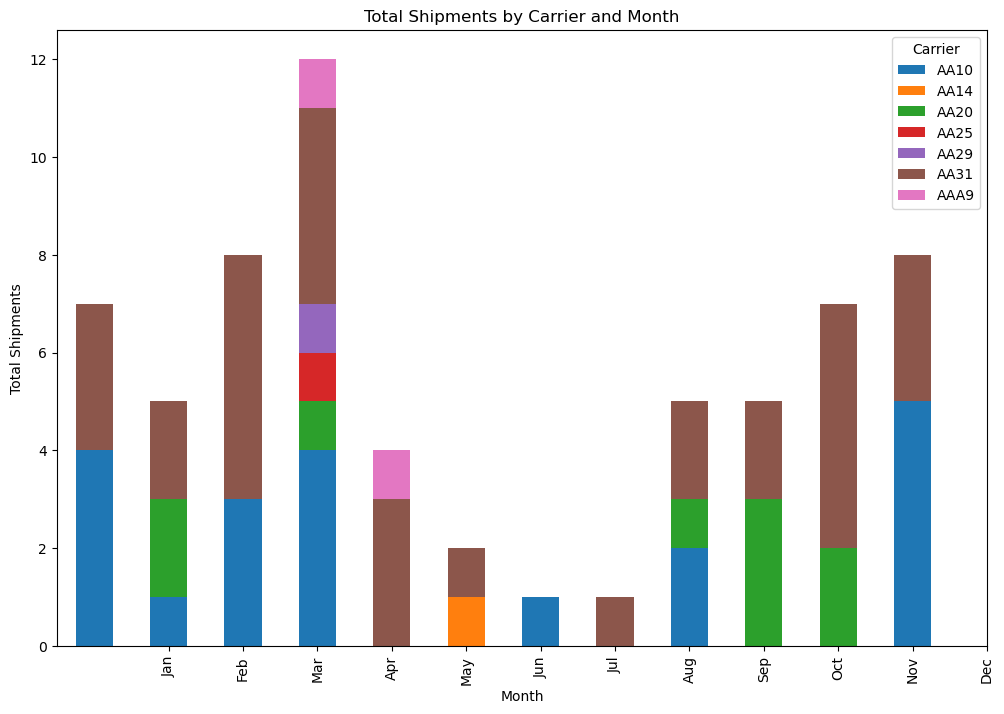

Carrier-wise Monthly Statistics:
scac   AA10  AA14  AA20  AA25  AA29  AA31  AAA9
month                                          
1       4.0   0.0   0.0   0.0   0.0   3.0   0.0
2       1.0   0.0   2.0   0.0   0.0   2.0   0.0
3       3.0   0.0   0.0   0.0   0.0   5.0   0.0
4       4.0   0.0   1.0   1.0   1.0   4.0   1.0
5       0.0   0.0   0.0   0.0   0.0   3.0   1.0
6       0.0   1.0   0.0   0.0   0.0   1.0   0.0
7       1.0   0.0   0.0   0.0   0.0   0.0   0.0
8       0.0   0.0   0.0   0.0   0.0   1.0   0.0
9       2.0   0.0   1.0   0.0   0.0   2.0   0.0
10      0.0   0.0   3.0   0.0   0.0   2.0   0.0
11      0.0   0.0   2.0   0.0   0.0   5.0   0.0
12      5.0   0.0   0.0   0.0   0.0   3.0   0.0


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with arrival_time, scac, and transit_time columns

# Convert arrival_time to datetime if it's not already
df_cleaned['depart_time'] = pd.to_datetime(df_cleaned['depart_time'])

# Extract month from arrival_time
df_cleaned['month'] = df_cleaned['depart_time'].dt.month

# Group by carrier (scac) and month to calculate total shipments
carrier_stats = df_cleaned.groupby(['scac', 'month']).size().reset_index(name='total_shipments')

# Pivot the table to have carriers as columns and months as rows
carrier_pivot = carrier_stats.pivot(index='month', columns='scac', values='total_shipments').fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
carrier_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Total Shipments by Carrier and Month')
plt.xlabel('Month')
plt.ylabel('Total Shipments')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Carrier')
plt.show()

# Displaying the aggregated statistics
print("Carrier-wise Monthly Statistics:")
print(carrier_pivot)


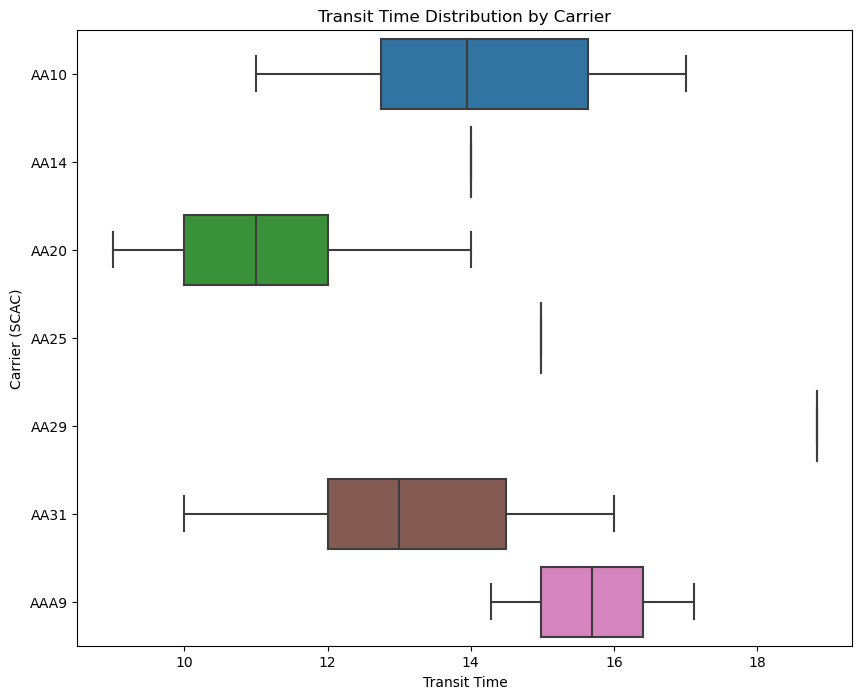

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame with transit_time and scac (carrier) columns

plt.figure(figsize=(10, 8))
sns.boxplot(x='transit_time', y='scac', data=df_cleaned, orient='h')
plt.title('Transit Time Distribution by Carrier')
plt.xlabel('Transit Time')
plt.ylabel('Carrier (SCAC)')
plt.show()



In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_cleaned_data is your cleaned dataset with relevant columns
# Aggregate data by carrier to get shipment_count and mean_transit_time
carrier_stats = df_cleaned.groupby('scac').agg(
    shipment_count=('transit_time', 'size'),
    mean_transit_time=('transit_time', 'mean')
).reset_index()

# Apply log transformation to both variables
carrier_stats['log_shipment_count'] = np.log(carrier_stats['shipment_count'])
carrier_stats['log_mean_transit_time'] = np.log(carrier_stats['mean_transit_time'])

# Display the first few rows of carrier_stats for verification
carrier_stats


,scac,shipment_count,mean_transit_time,log_shipment_count,log_mean_transit_time
0,AA10,20,13.816007,2.995732,2.625828
1,AA14,1,14.000000,0.000000,2.639057
2,AA20,9,11.190818,2.197225,2.415094
3,AA25,1,14.974306,0.000000,2.706336
4,AA29,1,18.836806,0.000000,2.935813
5,AA31,31,13.297917,3.433987,2.587607
6,AAA9,2,15.695486,0.693147,2.753373


Intercept (β0): 2.7520666568944394
Slope (β1): -0.06452284500165095
Mean Squared Error: 0.013800797429773123
R-squared: 0.3706431171299276


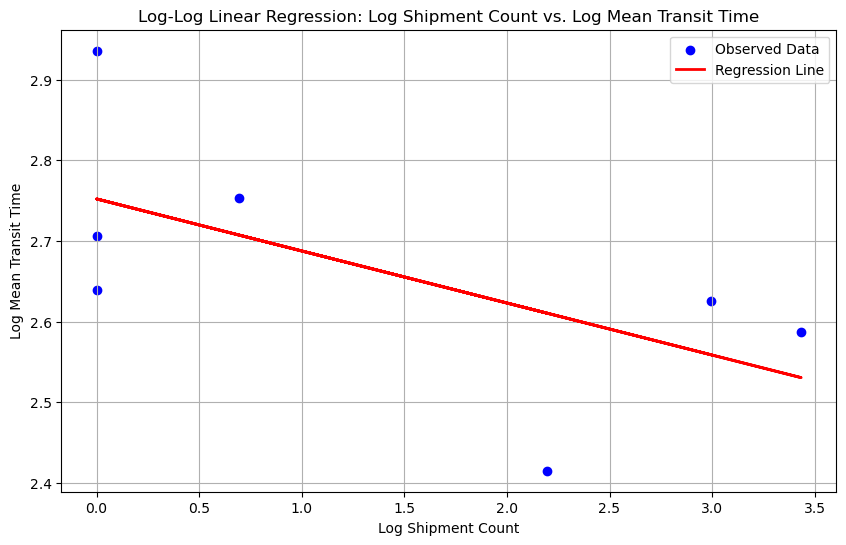

In [47]:
# Prepare the data for regression
X = carrier_stats['log_shipment_count'].values.reshape(-1, 1)  # Independent variable (log of shipment count)
y = carrier_stats['log_mean_transit_time'].values  # Dependent variable (log of mean transit time)

# Fit the linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

# Make predictions
y_pred = linear_regressor.predict(X)

# Calculate coefficients
intercept = linear_regressor.intercept_
slope = linear_regressor.coef_[0]

# Calculate performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the coefficients and performance metrics
print(f"Intercept (β0): {intercept}")
print(f"Slope (β1): {slope}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the regression line on log-log scale
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Observed Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Log-Log Linear Regression: Log Shipment Count vs. Log Mean Transit Time')
plt.xlabel('Log Shipment Count')
plt.ylabel('Log Mean Transit Time')
plt.legend()
plt.grid(True)
plt.show()